In [71]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [3]:
phone = pd.read_csv('D:\Rishabh\coding\machine learning\PhonePricePrecdictor\smartphones_cleaned_v6.csv')
phone.head(10)

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.20,...,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.20,...,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.40,...,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.20,...,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.60,...,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412
5,samsung,Samsung Galaxy F23 5G (6GB RAM + 128GB),16999,80.0,True,True,False,snapdragon,8.0,2.20,...,120,3,1.0,android,50.0,8.0,1,1024.0,1080,2408
6,apple,Apple iPhone 14,65999,81.0,True,True,False,bionic,6.0,3.22,...,60,2,1.0,ios,12.0,12.0,0,NaN,1170,2532
7,xiaomi,Xiaomi Redmi Note 12 Pro Plus,29999,86.0,True,False,True,dimensity,8.0,2.60,...,120,3,1.0,android,200.0,16.0,0,NaN,1080,2400
8,nothing,Nothing Phone 1,26749,85.0,True,True,False,snapdragon,8.0,2.50,...,120,2,1.0,android,50.0,16.0,0,NaN,1080,2400
9,oneplus,OnePlus Nord 2T 5G,28999,84.0,True,True,False,dimensity,8.0,3.00,...,90,3,1.0,android,50.0,32.0,0,NaN,1080,2400


### taking a quick look at the data

In [4]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    float64

### handling outliers

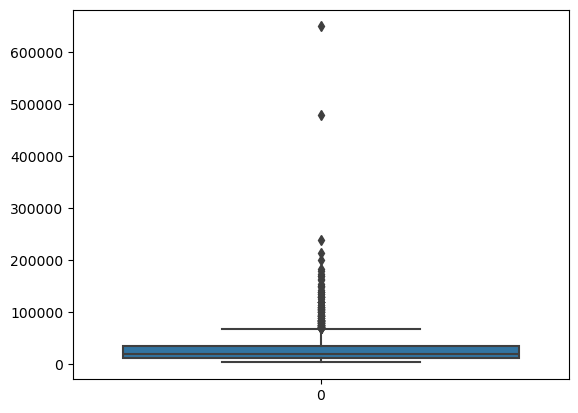

In [5]:
sns.boxplot(phone['price'])
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2156\2186055444.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '69230.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  phone.loc[phone["price"]>ul, "price"]=ul


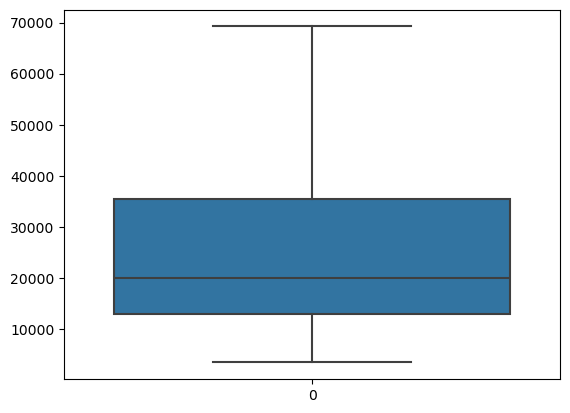

In [6]:
q1=phone["price"].quantile(0.25)
q3=phone["price"].quantile(0.75)

iqr=q3-q1

ul=q3+1.5*iqr

phone.loc[phone["price"]>ul, "price"]=ul

sns.boxplot(phone['price'])
plt.show()

In [7]:
phone['price'] = phone['price'].replace({69230.25: 69230})

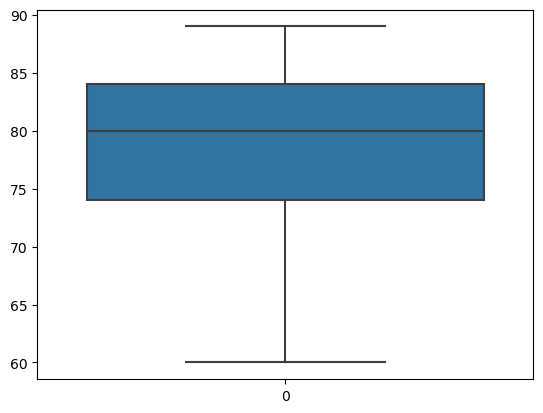

In [8]:
sns.boxplot(phone['rating'])
plt.show()

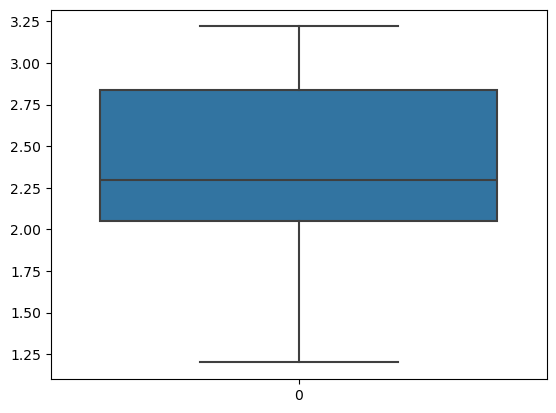

In [9]:
sns.boxplot(phone['processor_speed'])
plt.show()

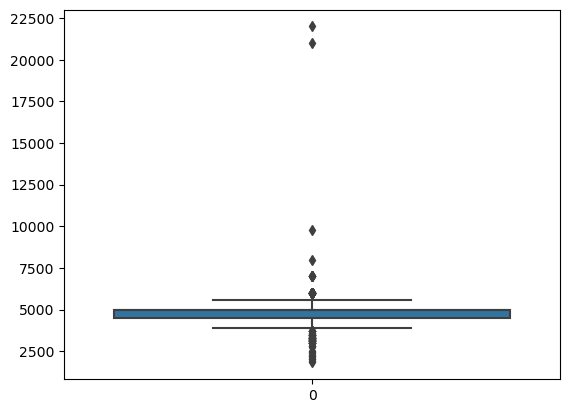

In [10]:
sns.boxplot(phone['battery_capacity'])
plt.show()

In [11]:
q1=phone["battery_capacity"].quantile(0.25)
q3=phone["battery_capacity"].quantile(0.75)

iqr=q3-q1

ul=q3+1.5*iqr

phone.loc[phone["battery_capacity"]>ul, "battery_capacity"]=ul

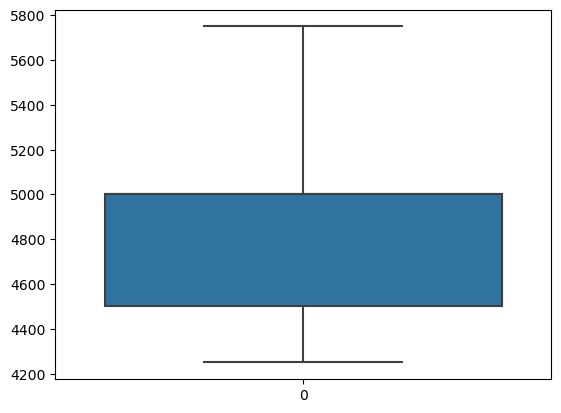

In [12]:
q1=phone["battery_capacity"].quantile(0.25)
q3=phone["battery_capacity"].quantile(0.75)

iqr=q3-q1

ll=q3-1.5*iqr

phone.loc[phone["battery_capacity"]<ll, "battery_capacity"]=ll

sns.boxplot(phone['battery_capacity'])
plt.show()

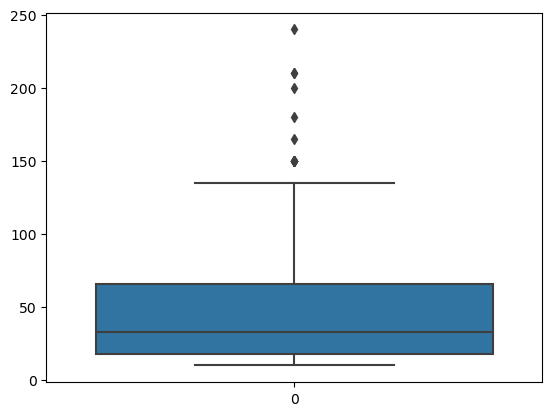

In [13]:
sns.boxplot(phone['fast_charging'])
plt.show()

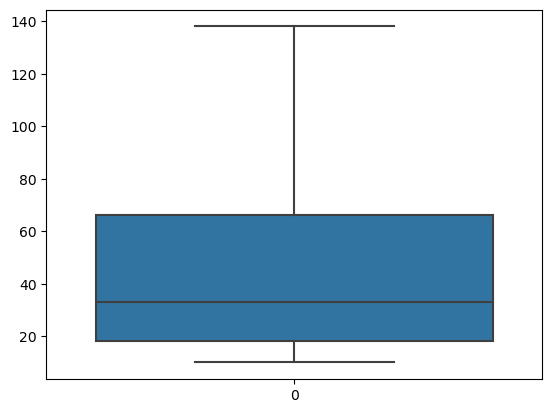

In [14]:
q1=phone["fast_charging"].quantile(0.25)
q3=phone["fast_charging"].quantile(0.75)

iqr=q3-q1

ul=q3+1.5*iqr

phone.loc[phone["fast_charging"]>ul, "fast_charging"]=ul

sns.boxplot(phone['fast_charging'])
plt.show()

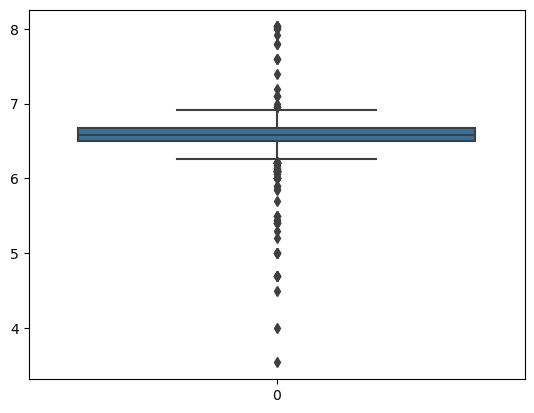

In [15]:
sns.boxplot(phone['screen_size'])
plt.show()

In [16]:
q1=phone["screen_size"].quantile(0.25)
q3=phone["screen_size"].quantile(0.75)

iqr=q3-q1

ul=q3+1.5*iqr

phone.loc[phone["screen_size"]>ul, "screen_size"]=ul

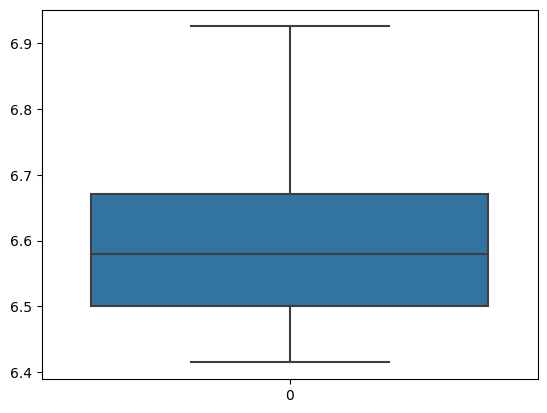

In [17]:
q1=phone["screen_size"].quantile(0.25)
q3=phone["screen_size"].quantile(0.75)

iqr=q3-q1

ll=q3-1.5*iqr

phone.loc[phone["screen_size"]<ll, "screen_size"]=ll

sns.boxplot(phone['screen_size'])
plt.show()

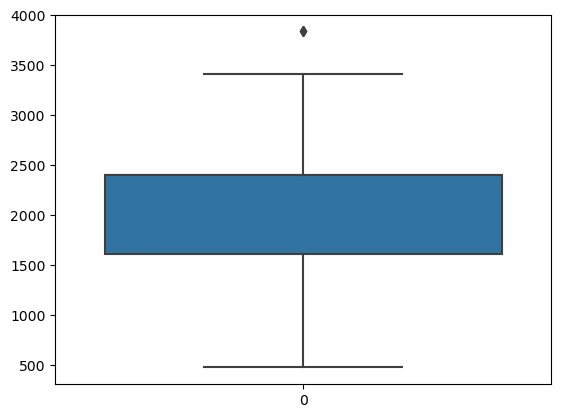

In [18]:
sns.boxplot(phone['resolution_height'])
plt.show()

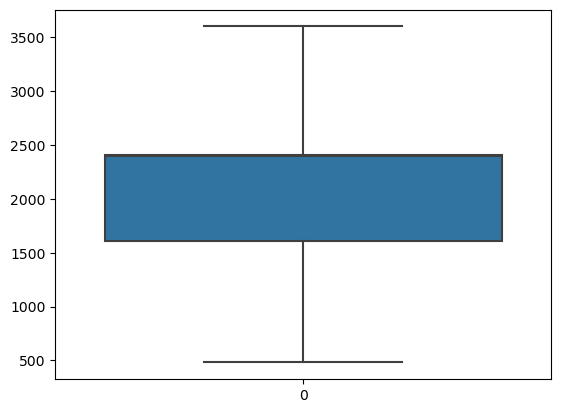

In [19]:
q1=phone["resolution_height"].quantile(0.25)
q3=phone["resolution_height"].quantile(0.75)

iqr=q3-q1

ul=q3+1.5*iqr

phone.loc[phone["resolution_height"]>ul, "resolution_height"]=ul

sns.boxplot(phone['resolution_height'])
plt.show()

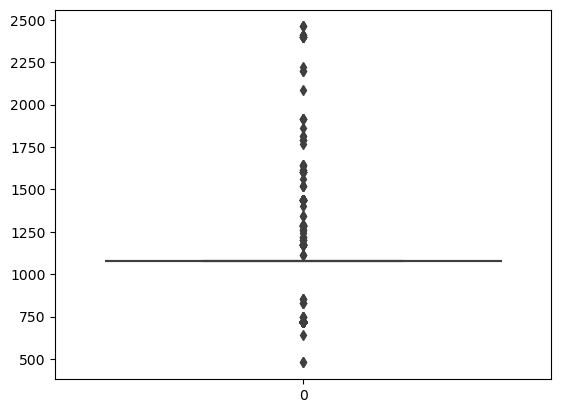

In [20]:
sns.boxplot(phone['resolution_width'])
plt.show()

In [21]:
q1=phone["resolution_width"].quantile(0.25)
q3=phone["resolution_width"].quantile(0.75)

iqr=q3-q1

ul=q3+1.5*iqr

phone.loc[phone["resolution_width"]>ul, "resolution_width"]=ul

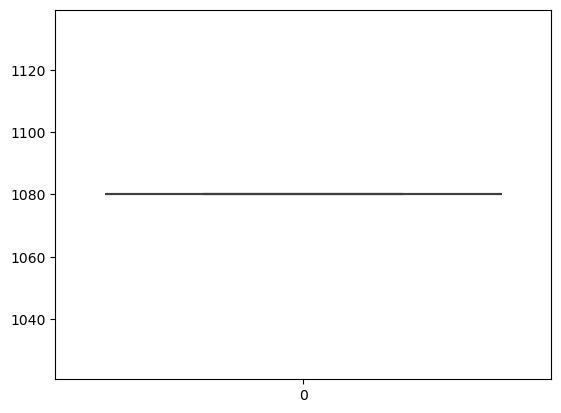

In [22]:
q1=phone["resolution_width"].quantile(0.25)
q3=phone["resolution_width"].quantile(0.75)

iqr=q3-q1

ll=q3-1.5*iqr

phone.loc[phone["resolution_width"]<ll, "resolution_width"]=ll

sns.boxplot(phone['resolution_width'])
plt.show()

In [23]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    float64
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    float64

### Imputing numerical values 

In [24]:
phone_num = phone.drop(columns=['brand_name', 'model', 'has_5g', 'has_nfc', 'has_ir_blaster', 'processor_brand', 'os'])

imputer_num = SimpleImputer(strategy='median')
X = imputer_num.fit_transform(phone_num)

In [25]:
phone_num_tr = pd.DataFrame(X, columns=phone_num.columns)
phone_num_tr

,price,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,54999.0,89.0,8.0,3.20,5000.0,1.0,100.0,12.0,256.0,6.70,120.0,3.0,1.0,50.0,16.0,0.0,1024.0,1080.0,3216.0
1,19989.0,81.0,8.0,2.20,5000.0,1.0,33.0,6.0,128.0,6.59,120.0,3.0,1.0,64.0,16.0,1.0,1024.0,1080.0,2412.0
2,16499.0,75.0,8.0,2.40,5000.0,1.0,15.0,4.0,64.0,6.60,90.0,3.0,1.0,50.0,13.0,1.0,1024.0,1080.0,2408.0
3,14999.0,81.0,8.0,2.20,5000.0,1.0,33.0,6.0,128.0,6.55,120.0,3.0,1.0,50.0,16.0,1.0,1024.0,1080.0,2400.0
4,24999.0,82.0,8.0,2.60,5000.0,1.0,67.0,6.0,128.0,6.70,120.0,3.0,1.0,108.0,16.0,0.0,1024.0,1080.0,2412.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,34990.0,83.0,8.0,3.00,5000.0,1.0,68.0,8.0,128.0,6.67,120.0,3.0,1.0,64.0,16.0,0.0,1024.0,1080.0,2460.0
976,14990.0,75.0,8.0,2.20,5000.0,1.0,22.0,6.0,128.0,6.50,60.0,3.0,1.0,48.0,8.0,1.0,1024.0,1080.0,1600.0
977,28990.0,85.0,8.0,2.85,5080.0,1.0,67.0,8.0,256.0,6.60,144.0,3.0,1.0,64.0,16.0,0.0,1024.0,1080.0,2460.0
978,19990.0,80.0,8.0,2.20,5000.0,1.0,33.0,6.0,128.0,6.80,60.0,3.0,1.0,108.0,32.0,1.0,1024.0,1080.0,2400.0


### Imputing categorical data

In [26]:
imputer_cat = SimpleImputer(strategy='constant', fill_value='unkown')

phone_cat = phone[['brand_name', 'model', 'has_5g', 'has_nfc', 'has_ir_blaster', 'processor_brand', 'os']]
Y = imputer_cat.fit_transform(phone_cat)

In [27]:
phone_cat_tr = pd.DataFrame(Y, columns=phone_cat.columns)
phone_cat_tr


,brand_name,model,has_5g,has_nfc,has_ir_blaster,processor_brand,os
0,oneplus,OnePlus 11 5G,True,True,False,snapdragon,android
1,oneplus,OnePlus Nord CE 2 Lite 5G,True,False,False,snapdragon,android
2,samsung,Samsung Galaxy A14 5G,True,False,False,exynos,android
3,motorola,Motorola Moto G62 5G,True,False,False,snapdragon,android
4,realme,Realme 10 Pro Plus,True,False,False,dimensity,android
...,...,...,...,...,...,...,...
975,motorola,Motorola Moto Edge S30 Pro,True,False,False,snapdragon,android
976,honor,Honor X8 5G,True,False,False,snapdragon,android
977,poco,POCO X4 GT 5G (8GB RAM + 256GB),True,True,True,dimensity,android
978,motorola,Motorola Moto G91 5G,True,True,False,snapdragon,android


In [28]:
phone_combined = pd.concat([phone_num_tr, phone_cat_tr], axis=1)
phone_combined

,price,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,...,extended_upto,resolution_width,resolution_height,brand_name,model,has_5g,has_nfc,has_ir_blaster,processor_brand,os
0,54999.0,89.0,8.0,3.20,5000.0,1.0,100.0,12.0,256.0,6.70,...,1024.0,1080.0,3216.0,oneplus,OnePlus 11 5G,True,True,False,snapdragon,android
1,19989.0,81.0,8.0,2.20,5000.0,1.0,33.0,6.0,128.0,6.59,...,1024.0,1080.0,2412.0,oneplus,OnePlus Nord CE 2 Lite 5G,True,False,False,snapdragon,android
2,16499.0,75.0,8.0,2.40,5000.0,1.0,15.0,4.0,64.0,6.60,...,1024.0,1080.0,2408.0,samsung,Samsung Galaxy A14 5G,True,False,False,exynos,android
3,14999.0,81.0,8.0,2.20,5000.0,1.0,33.0,6.0,128.0,6.55,...,1024.0,1080.0,2400.0,motorola,Motorola Moto G62 5G,True,False,False,snapdragon,android
4,24999.0,82.0,8.0,2.60,5000.0,1.0,67.0,6.0,128.0,6.70,...,1024.0,1080.0,2412.0,realme,Realme 10 Pro Plus,True,False,False,dimensity,android
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,34990.0,83.0,8.0,3.00,5000.0,1.0,68.0,8.0,128.0,6.67,...,1024.0,1080.0,2460.0,motorola,Motorola Moto Edge S30 Pro,True,False,False,snapdragon,android
976,14990.0,75.0,8.0,2.20,5000.0,1.0,22.0,6.0,128.0,6.50,...,1024.0,1080.0,1600.0,honor,Honor X8 5G,True,False,False,snapdragon,android
977,28990.0,85.0,8.0,2.85,5080.0,1.0,67.0,8.0,256.0,6.60,...,1024.0,1080.0,2460.0,poco,POCO X4 GT 5G (8GB RAM + 256GB),True,True,True,dimensity,android
978,19990.0,80.0,8.0,2.20,5000.0,1.0,33.0,6.0,128.0,6.80,...,1024.0,1080.0,2400.0,motorola,Motorola Moto G91 5G,True,True,False,snapdragon,android


### looking for correlations

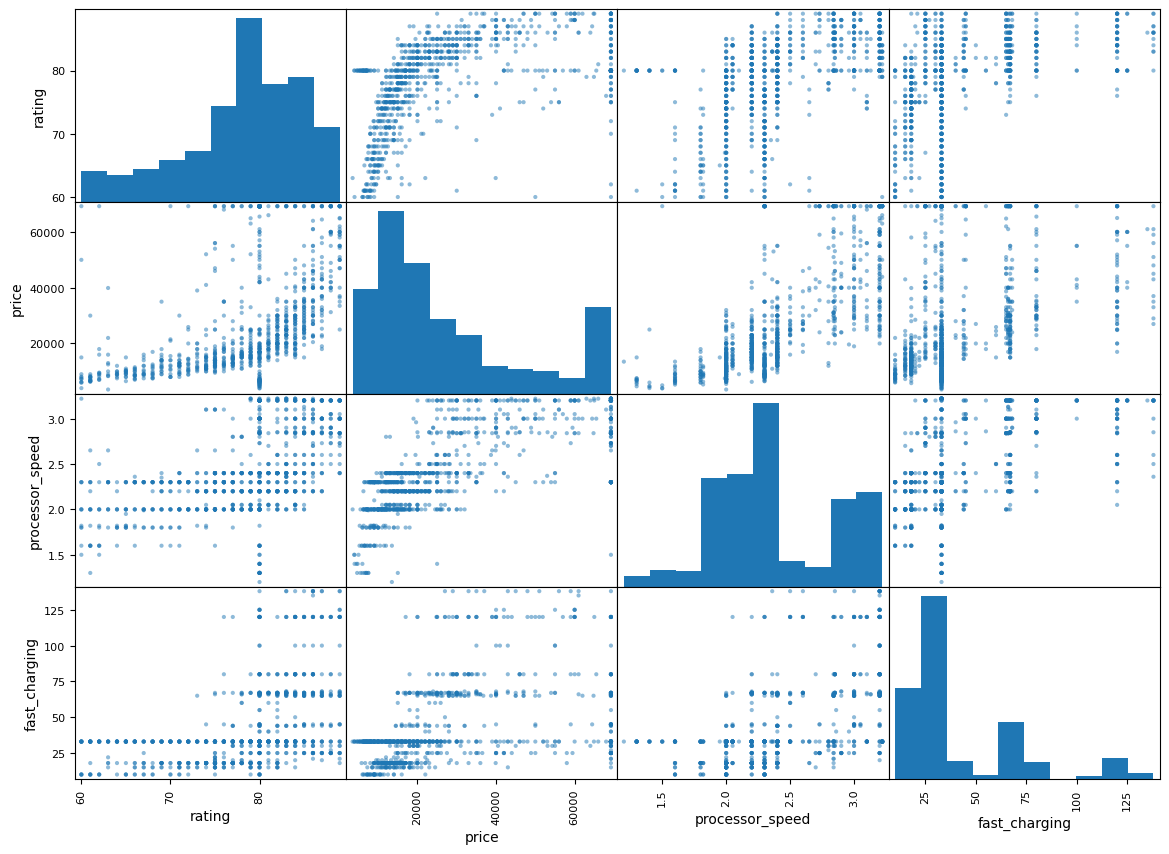

In [29]:
attributes = ['rating', 'price', 'processor_speed', 'fast_charging']

scatter_matrix(phone_combined[attributes], figsize=(14,10))
plt.show()

### label encoding categorical data

In [30]:
phone_combined = phone_combined.drop('model', axis=1)
phone_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   price                      980 non-null    float64
 1   rating                     980 non-null    float64
 2   num_cores                  980 non-null    float64
 3   processor_speed            980 non-null    float64
 4   battery_capacity           980 non-null    float64
 5   fast_charging_available    980 non-null    float64
 6   fast_charging              980 non-null    float64
 7   ram_capacity               980 non-null    float64
 8   internal_memory            980 non-null    float64
 9   screen_size                980 non-null    float64
 10  refresh_rate               980 non-null    float64
 11  num_rear_cameras           980 non-null    float64
 12  num_front_cameras          980 non-null    float64
 13  primary_camera_rear        980 non-null    float64

In [31]:
label_encoder = LabelEncoder()

phone_combined['brand_name'] = label_encoder.fit_transform(phone_combined['brand_name'])
phone_combined['has_5g'] = label_encoder.fit_transform(phone_combined['has_5g'])
phone_combined['has_nfc'] = label_encoder.fit_transform(phone_combined['has_nfc'])
phone_combined['has_ir_blaster'] = label_encoder.fit_transform(phone_combined['has_ir_blaster'])
phone_combined['processor_brand'] = label_encoder.fit_transform(phone_combined['processor_brand'])
phone_combined['os'] = label_encoder.fit_transform(phone_combined['os'])

phone_combined

,price,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,...,extended_memory_available,extended_upto,resolution_width,resolution_height,brand_name,has_5g,has_nfc,has_ir_blaster,processor_brand,os
0,54999.0,89.0,8.0,3.20,5000.0,1.0,100.0,12.0,256.0,6.70,...,0.0,1024.0,1080.0,3216.0,29,1,1,0,9,0
1,19989.0,81.0,8.0,2.20,5000.0,1.0,33.0,6.0,128.0,6.59,...,1.0,1024.0,1080.0,2412.0,29,1,0,0,9,0
2,16499.0,75.0,8.0,2.40,5000.0,1.0,15.0,4.0,64.0,6.60,...,1.0,1024.0,1080.0,2408.0,36,1,0,0,2,0
3,14999.0,81.0,8.0,2.20,5000.0,1.0,33.0,6.0,128.0,6.55,...,1.0,1024.0,1080.0,2400.0,25,1,0,0,9,0
4,24999.0,82.0,8.0,2.60,5000.0,1.0,67.0,6.0,128.0,6.70,...,0.0,1024.0,1080.0,2412.0,33,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,34990.0,83.0,8.0,3.00,5000.0,1.0,68.0,8.0,128.0,6.67,...,0.0,1024.0,1080.0,2460.0,25,1,0,0,9,0
976,14990.0,75.0,8.0,2.20,5000.0,1.0,22.0,6.0,128.0,6.50,...,1.0,1024.0,1080.0,1600.0,10,1,0,0,9,0
977,28990.0,85.0,8.0,2.85,5080.0,1.0,67.0,8.0,256.0,6.60,...,0.0,1024.0,1080.0,2460.0,32,1,1,1,1,0
978,19990.0,80.0,8.0,2.20,5000.0,1.0,33.0,6.0,128.0,6.80,...,1.0,1024.0,1080.0,2400.0,25,1,1,0,9,0


### scaling numeric values 

In [32]:
phone_to_scale = phone_combined.drop(columns=['price', 'brand_name', 'has_5g', 'has_nfc',
                                              'has_ir_blaster', 'processor_brand', 'os', 'fast_charging_available',
                                              'extended_memory_available'])

scaler = StandardScaler()

scaled_data = scaler.fit_transform(phone_to_scale)

In [33]:
phone_scaled = pd.DataFrame(scaled_data, columns=phone_to_scale.columns)
phone_scaled

,rating,num_cores,processor_speed,battery_capacity,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_upto,resolution_width,resolution_height
0,1.503094,0.271606,1.712195,0.399004,1.982151,1.983172,1.073622,0.894839,0.957568,0.239309,-0.174626,-0.009680,-0.054053,0.491712,0.0,1.949203
1,0.364628,0.271606,-0.487906,0.399004,-0.340801,-0.204232,-0.121748,0.055806,0.957568,0.239309,-0.174626,0.414767,-0.054053,0.491712,0.0,0.385274
2,-0.489221,0.271606,-0.047886,0.399004,-0.964878,-0.933367,-0.719433,0.132082,-0.077869,0.239309,-0.174626,-0.009680,-0.330715,0.491712,0.0,0.377493
3,0.364628,0.271606,-0.487906,0.399004,-0.340801,-0.204232,-0.121748,-0.249297,0.957568,0.239309,-0.174626,-0.009680,-0.054053,0.491712,0.0,0.361932
4,0.506937,0.271606,0.392134,0.399004,0.838010,-0.204232,-0.121748,0.894839,0.957568,0.239309,-0.174626,1.748742,-0.054053,0.491712,0.0,0.385274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,0.649245,0.271606,1.272174,0.399004,0.872681,0.524903,-0.121748,0.666012,0.957568,0.239309,-0.174626,0.414767,-0.054053,0.491712,0.0,0.478643
976,-0.489221,0.271606,-0.487906,0.399004,-0.722181,-0.204232,-0.121748,-0.630676,-1.113307,0.239309,-0.174626,-0.070315,-0.791819,0.491712,0.0,-1.194217
977,0.933861,0.271606,0.942159,0.602619,0.838010,0.524903,1.073622,0.132082,1.785918,0.239309,-0.174626,0.414767,-0.054053,0.491712,0.0,0.478643
978,0.222320,0.271606,-0.487906,0.399004,-0.340801,-0.204232,-0.121748,1.657597,-1.113307,0.239309,-0.174626,1.748742,1.421481,0.491712,0.0,0.361932


In [34]:
columns_to_replace = ['rating', 'num_cores', 'processor_speed', 'battery_capacity',
                    'fast_charging', 'ram_capacity', 'internal_memory', 'screen_size',
                    'refresh_rate', 'num_rear_cameras', 'num_front_cameras', 'primary_camera_rear',
                    'primary_camera_front', 'extended_upto', 'resolution_width', 'resolution_height']

phone_combined = phone_combined.drop(columns=columns_to_replace, axis=1)
phone_combined

,price,fast_charging_available,extended_memory_available,brand_name,has_5g,has_nfc,has_ir_blaster,processor_brand,os
0,54999.0,1.0,0.0,29,1,1,0,9,0
1,19989.0,1.0,1.0,29,1,0,0,9,0
2,16499.0,1.0,1.0,36,1,0,0,2,0
3,14999.0,1.0,1.0,25,1,0,0,9,0
4,24999.0,1.0,0.0,33,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
975,34990.0,1.0,0.0,25,1,0,0,9,0
976,14990.0,1.0,1.0,10,1,0,0,9,0
977,28990.0,1.0,0.0,32,1,1,1,1,0
978,19990.0,1.0,1.0,25,1,1,0,9,0


In [35]:
phone_final = pd.concat([phone_combined, phone_scaled], axis=1)
phone_final

,price,fast_charging_available,extended_memory_available,brand_name,has_5g,has_nfc,has_ir_blaster,processor_brand,os,rating,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_upto,resolution_width,resolution_height
0,54999.0,1.0,0.0,29,1,1,0,9,0,1.503094,...,1.073622,0.894839,0.957568,0.239309,-0.174626,-0.009680,-0.054053,0.491712,0.0,1.949203
1,19989.0,1.0,1.0,29,1,0,0,9,0,0.364628,...,-0.121748,0.055806,0.957568,0.239309,-0.174626,0.414767,-0.054053,0.491712,0.0,0.385274
2,16499.0,1.0,1.0,36,1,0,0,2,0,-0.489221,...,-0.719433,0.132082,-0.077869,0.239309,-0.174626,-0.009680,-0.330715,0.491712,0.0,0.377493
3,14999.0,1.0,1.0,25,1,0,0,9,0,0.364628,...,-0.121748,-0.249297,0.957568,0.239309,-0.174626,-0.009680,-0.054053,0.491712,0.0,0.361932
4,24999.0,1.0,0.0,33,1,0,0,1,0,0.506937,...,-0.121748,0.894839,0.957568,0.239309,-0.174626,1.748742,-0.054053,0.491712,0.0,0.385274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,34990.0,1.0,0.0,25,1,0,0,9,0,0.649245,...,-0.121748,0.666012,0.957568,0.239309,-0.174626,0.414767,-0.054053,0.491712,0.0,0.478643
976,14990.0,1.0,1.0,10,1,0,0,9,0,-0.489221,...,-0.121748,-0.630676,-1.113307,0.239309,-0.174626,-0.070315,-0.791819,0.491712,0.0,-1.194217
977,28990.0,1.0,0.0,32,1,1,1,1,0,0.933861,...,1.073622,0.132082,1.785918,0.239309,-0.174626,0.414767,-0.054053,0.491712,0.0,0.478643
978,19990.0,1.0,1.0,25,1,1,0,9,0,0.222320,...,-0.121748,1.657597,-1.113307,0.239309,-0.174626,1.748742,1.421481,0.491712,0.0,0.361932


### splitting data

In [36]:
X = phone_final.drop('price', axis=1)
y = phone_final['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Evaluating the training set 

In [40]:
# Linear regression 

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [42]:
some_data = X_train.iloc[:5]
some_price = y_train.iloc[:5]

print('Predictions: ', lin_reg.predict(some_data))
print( y_train[:5])

Predictions:  [40312.69585316 58223.24270089 12329.35837437 19831.62985057
 43504.71015375]
481    69230.0
974    69230.0
667    13999.0
589    17990.0
33     38999.0
Name: price, dtype: float64


In [45]:
phone_pred1 = lin_reg.predict(X_train)
phone_pred2 = lin_reg.predict(X_test)

lin_mse = mean_squared_error(y_train, phone_pred1)
lin_rmse = np.sqrt(lin_mse)
train_lin_r2 = r2_score(y_train, phone_pred1)
test_lin_r2 = r2_score(y_test, phone_pred2)

print(lin_rmse)
print('train r2: ', train_lin_r2)
print('test r2: ', test_lin_r2)

8840.458046572136
train r2:  0.7954099937429964
test r2:  0.7931072615712692


In [47]:
# Decision Tree Regressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [48]:
phone_pred3 = tree_reg.predict(X_train)
phone_pred4 = tree_reg.predict(X_test)

train_tree_r2 = r2_score(y_train, phone_pred3)
test_tree_r2 = r2_score(y_test, phone_pred4)

print('train r2: ', train_tree_r2)
print('test r2: ', test_tree_r2) #### decision tree model is overfiting 

train r2:  0.9999538973676464
test r2:  0.7617439624260887


In [50]:
# Random Forest Regressor 
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [51]:
phone_pred5 = forest_reg.predict(X_train)
phone_pred6 = forest_reg.predict(X_test)

print('train r2: ', r2_score(y_train, phone_pred5))
print('test r2: ', r2_score(y_test, phone_pred6)) # kind overfiting

train r2:  0.9842643364809501
test r2:  0.8614031194914782


In [53]:
# Lasso Regression 
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

Lasso()

In [55]:
phone_pred7 = lasso_reg.predict(X_train)
phone_pred8 = lasso_reg.predict(X_test)

print('train r2: ', r2_score(y_train, phone_pred7))
print('test r2: ', r2_score(y_test, phone_pred8))

train r2:  0.7954097697130023
test r2:  0.793098355414159


In [57]:
# Ridge Regression 
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

Ridge()

In [58]:
phone_pred9 = ridge_reg.predict(X_train)
phone_pred10 = ridge_reg.predict(X_test)

print('train r2: ', r2_score(y_train, phone_pred9))
print('test r2: ', r2_score(y_test, phone_pred10))

train r2:  0.7954056005107926
test r2:  0.7930336516416874


In [61]:
# KNeighboresRegressor

knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [63]:
phone_pred11 = knn_reg.predict(X_train)
phone_pred12 = knn_reg.predict(X_test)

print('train r2: ', r2_score(y_train, phone_pred11))
print('test r2: ', r2_score(y_test, phone_pred12))

train r2:  0.8856669681658571
test r2:  0.8136321647191844


In [72]:
# GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [73]:
phone_pred13 = gb_reg.predict(X_train)
phone_pred14 = gb_reg.predict(X_test)

print('train r2: ', r2_score(y_train, phone_pred13))
print('test r2: ', r2_score(y_test, phone_pred14))

train r2:  0.9606685450891295
test r2:  0.869576139666999


### Fine Tuning using GridSearchCV

In [74]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0]
}

grid_search = GridSearchCV(estimator=gb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [75]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='neg_mean_squared_error')

In [76]:
best_model = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200, 'subsample': 0.6}


### final predictions

In [77]:
phone_predictions = best_model.predict(X_test)

print('final r2: ', r2_score(y_test, phone_predictions))

final r2:  0.8817899224680714
